In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math 
import random
import numba
from numba import jit
import copy

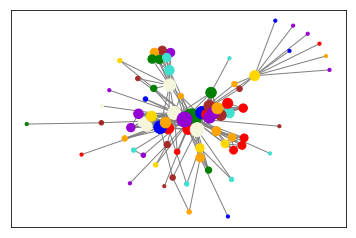

77


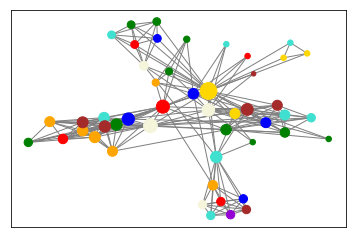

49
[(0, 3), (1, 3), (2, 3), (3, 28), (11, 13), (12, 10), (13, 14), (14, 11), (15, 16), (16, 2), (17, 8), (18, 3), (19, 6), (20, 6), (21, 6), (22, 6), (23, 6), (26, 3), (27, 19), (28, 5), (29, 5), (31, 17), (33, 15), (39, 13), (42, 10), (43, 10), (44, 10), (45, 9), (46, 3), (4, 7), (5, 9), (6, 7), (7, 7), (8, 7), (9, 7), (10, 7), (24, 11), (25, 3), (47, 7), (30, 4), (32, 10), (37, 13), (34, 11), (35, 9), (36, 11), (38, 12), (40, 12), (41, 10), (48, 7)]


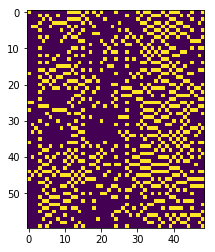

F11:0.7665706051873199,F12:0.4296875


In [2]:
#G = nx.karate_club_graph()
G=nx.les_miserables_graph()
colors = ["blue","gold","brown","red","darkviolet","green","orange","beige","turquoise"]
n=len(G.nodes)
nx.draw_networkx(G,node_color=random.choices(colors,k=n),edge_color='grey',node_size=[10*G.degree[i] for i in G.nodes],with_labels=False)
plt.show()
print(n)

for i in set(G.nodes):
    if G.degree[i]<3:
        G.remove_nodes_from([i])
nx.draw_networkx(G,node_color=random.choices(colors,k=n),edge_color='grey',node_size=[10*G.degree[i] for i in G.nodes],with_labels=False)
plt.show()
n=len(G.nodes)
print(n)

name=list(G.nodes)
bind=list(G.edges)
G1=nx.Graph()
for i in range(n):
    for j in range(n):
            if ((name[i],name[j]) in bind)|((name[j],name[i]) in bind):
                G1.add_edges_from([[i,j]])
G=G1

print(G.degree)

import generator
from generator import generateG
M=20000
alpha=1.5
omega=1
rho0=0.3
mu=1
p3e=0.6

import analyzeG
anre=analyzeG.analyze(G,n,alpha,omega,p3e)
beta1=anre[0]
beta2=anre[1]
twobody=anre[2]
threebody=anre[3]

import getMatrix
PSI=getMatrix.getPSI(M,n,G,threebody,beta1,beta2,mu,rho0,t=0)
plt.imshow(PSI[0:60,:])
plt.show()

Pt=getMatrix.getPt(PSI,n,M)

import index
S1=index.index_step1(M,n,PSI,Pt,times=0,TM=200)
P1=S1[0]
eps=S1[1]
rhoe=S1[2]
rho1=S1[3]

delta_hat=generator.threshold1(n,P1)
G_hat=generator.generateG_hat(n,P1,delta_hat)

import F1s
F11=F1s.F1(G,G_hat,n,TP1=0,TN1=0,FP1=0,FN1=0)

anre1=analyzeG.analyze(G_hat,n,alpha,omega,p3e)
twobody_hat=np.array(anre1[2])
threebody_hat=np.array(anre1[3])
Pt1=getMatrix.getPt1(PSI,twobody_hat,n,M)

PSI2=getMatrix.getPSI2(PSI,twobody_hat,M)
S2=index.index_step2(M,n,PSI,PSI2,rhoe,rho1,P1,eps,Pt,Pt1,twobody_hat,times=0,TM=200)
P1=S2[0]
P2=S2[1]
eps=S2[2]
rhoe=S2[3]
rho1=S2[4]
rho2=S2[5]

delta_hat1=generator.threshold1(n,P1)
delta_hat2=generator.threshold2(n,P2,twobody_hat)

G_hat2i=generator.generateG_hat2(n,P1,P2,twobody_hat,threebody_hat,delta_hat1,delta_hat2)
G_hat2=G_hat2i[0]
threebody_hat2=G_hat2i[1]
F12=F1s.F1(G,G_hat2,n,TP1=0,TN1=0,FP1=0,FN1=0)

print(f'F11:{F11},F12:{F12}')


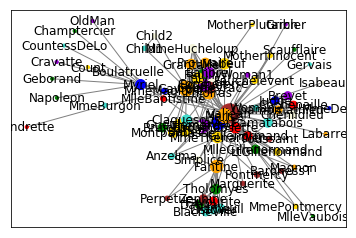

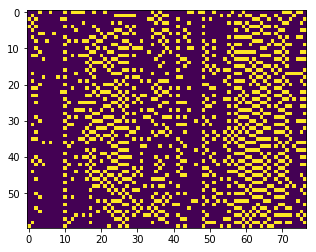

F11:0.5443786982248521,F12:0.5779036827195467


In [15]:
#G = nx.karate_club_graph()
G=nx.les_miserables_graph()
colors = ["blue","gold","brown","red","darkviolet","green","orange","beige","turquoise"]
n=len(G.nodes)
nx.draw_networkx(G,node_color=random.choices(colors,k=n),edge_color='grey',node_size=[10*G.degree[i] for i in G.nodes])
plt.show()

name=list(G.nodes)
bind=list(G.edges)
G1=nx.Graph()
for i in range(n):
    for j in range(n):
            if ((name[i],name[j]) in bind)|((name[j],name[i]) in bind):
                G1.add_edges_from([[i,j]])
G=G1

import generator
from generator import generateG
M=20000
alpha=1.5
omega=1
rho0=0.3
mu=1
p3e=0.6

import analyzeG
anre=analyzeG.analyze(G,n,alpha,omega,p3e)
beta1=anre[0]
beta2=anre[1]
twobody=anre[2]
threebody=anre[3]

import getMatrix
PSI=getMatrix.getPSI(M,n,G,threebody,beta1,beta2,mu,rho0,t=0)
plt.imshow(PSI[0:60,:])
plt.show()

Pt=getMatrix.getPt(PSI,n,M)

import index
S1=index.index_step1(M,n,PSI,Pt,times=0,TM=200)
P1=S1[0]
eps=S1[1]
rhoe=S1[2]
rho1=S1[3]

delta_hat=generator.threshold1(n,P1)
G_hat=generator.generateG_hat(n,P1,delta_hat)

import F1s
F11=F1s.F1(G,G_hat,n,TP1=0,TN1=0,FP1=0,FN1=0)

anre1=analyzeG.analyze(G_hat,n,alpha,omega,p3e)
twobody_hat=np.array(anre1[2])
threebody_hat=np.array(anre1[3])
Pt1=getMatrix.getPt1(PSI,twobody_hat,n,M)

PSI2=getMatrix.getPSI2(PSI,twobody_hat,M)
S2=index.index_step2(M,n,PSI,PSI2,rhoe,rho1,P1,eps,Pt,Pt1,twobody_hat,times=0,TM=200)
P1=S2[0]
P2=S2[1]
eps=S2[2]
rhoe=S2[3]
rho1=S2[4]
rho2=S2[5]

delta_hat1=generator.threshold1(n,P1)
delta_hat2=generator.threshold2(n,P2,twobody_hat)

G_hat2i=generator.generateG_hat2(n,P1,P2,twobody_hat,threebody_hat,delta_hat1,delta_hat2)
G_hat2=G_hat2i[0]
threebody_hat2=G_hat2i[1]
F12=F1s.F1(G,G_hat2,n,TP1=0,TN1=0,FP1=0,FN1=0)

print(f'F11:{F11},F12:{F12}')

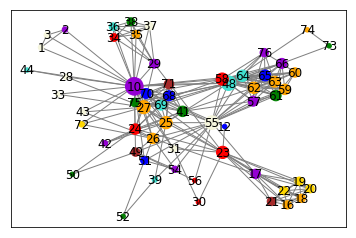

59


In [29]:
n=len(G.nodes)
for i in set(G.nodes):
    if G.degree[i]<2:
        G.remove_nodes_from([i])
nx.draw_networkx(G,node_color=random.choices(colors,k=n),edge_color='grey',node_size=[10*G.degree[i] for i in G.nodes],with_labels=True)
plt.show()
print(n)

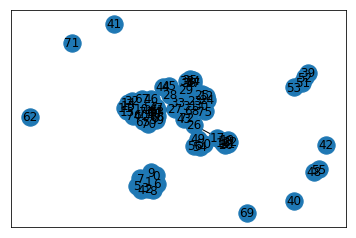

In [20]:
nx.draw_networkx(G_hat2)

In [5]:
beta1,beta2

(0.22736220472440946, 0.054960742326909354)

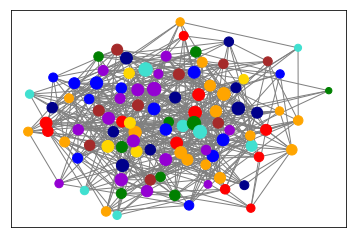

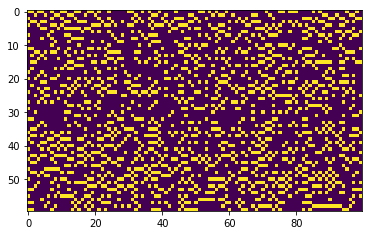

F11:0.995483288166215,F12:0.995483288166215


In [2]:
G = nx.gaussian_random_partition_graph(100, 10, 10, 0.25, 0.1)
colors = ["blue","gold","brown","red","darkviolet","green","orange","darkblue","turquoise"]
n=len(G.nodes)
nx.draw_networkx(G,node_color=random.choices(colors,k=n),edge_color='grey',node_size=[10*G.degree[i] for i in G.nodes],with_labels = True_)
plt.show()

import generator
from generator import generateG
M=20000
alpha=1.5
omega=1
rho0=0.3
mu=1
p3e=0.6

import analyzeG
anre=analyzeG.analyze(G,n,alpha,omega,p3e)
beta1=anre[0]
beta2=anre[1]
twobody=anre[2]
threebody=anre[3]

import getMatrix
PSI=getMatrix.getPSI(M,n,G,threebody,beta1,beta2,mu,rho0,t=0)
plt.imshow(PSI[0:60,:])
plt.show()

Pt=getMatrix.getPt(PSI,n,M)

import index
S1=index.index_step1(M,n,PSI,Pt,times=0,TM=200)
P1=S1[0]
eps=S1[1]
rhoe=S1[2]
rho1=S1[3]

delta_hat=generator.threshold1(n,P1)
G_hat=generator.generateG_hat(n,P1,delta_hat)

import F1s
F11=F1s.F1(G,G_hat,n,TP1=0,TN1=0,FP1=0,FN1=0)

anre1=analyzeG.analyze(G_hat,n,alpha,omega,p3e)
twobody_hat=np.array(anre1[2])
threebody_hat=np.array(anre1[3])
Pt1=getMatrix.getPt1(PSI,twobody_hat,n,M)

PSI2=getMatrix.getPSI2(PSI,twobody_hat,M)
S2=index.index_step2(M,n,PSI,PSI2,rhoe,rho1,P1,eps,Pt,Pt1,twobody_hat,times=0,TM=200)
P1=S2[0]
P2=S2[1]
eps=S2[2]
rhoe=S2[3]
rho1=S2[4]
rho2=S2[5]

delta_hat1=generator.threshold1(n,P1)
delta_hat2=generator.threshold2(n,P2,twobody_hat)

G_hat2i=generator.generateG_hat2(n,P1,P2,twobody_hat,threebody_hat,delta_hat1,delta_hat2)
G_hat2=G_hat2i[0]
threebody_hat2=G_hat2i[1]
F12=F1s.F1(G,G_hat2,n,TP1=0,TN1=0,FP1=0,FN1=0)

print(f'F11:{F11},F12:{F12}')

In [3]:
from graph import F1s